In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# DATA PREPROCESSING

In [2]:
data = pd.read_csv("Housing.csv")
data.shape

(20640, 10)

In [3]:
data = data.sample(n=1000, random_state=7)
sampled_indices = np.array(data.index)
sampled_indices

array([ 4648,  8740,   162, 15735, 18380, 10643, 10623,  1612,  2634,
       15995, 18482, 19348, 11830, 14031,  3643,  5597, 20060,  7343,
       14522,  8139,  1169, 15473,  2402, 17229, 15875, 17475,   971,
       14160,  1250, 11104, 13679, 12544,  7448, 18242,  9745, 15684,
       18931,  3979, 12195,   628,   149,  2459,  8912,  8240,  6960,
        8056, 20431,  8423, 13862, 14701, 14640, 12617, 13967,  4031,
         945, 15481, 12028, 11181, 17453, 19003,  5875,  3277,  4445,
        5398, 16072, 11849,  7171,  8517,  2351, 19766, 15766, 16306,
       16179, 14303, 16978,  5905, 19846, 13709, 16026,  8152, 14316,
        7257,  5247, 12793,  4409, 19438,  3449, 14008,  3437, 18672,
       15109, 20146,  6588,  9983, 12032,  2786,  4905,  5953,  3433,
        6681, 17066, 15488,  6905, 14747, 20082,  4617, 13563,  6442,
        4558, 18504, 10280, 19969,  5202,  1195, 19974,  7967,  5648,
       13522,  4940,  8169, 11138, 13338,  1283,   444, 12756,  3705,
       12779, 18478,

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4648     -118.31     34.06               31.00      2827.00         1084.00   
8740     -118.31     33.81               30.00      1773.00          356.00   
162      -122.24     37.81               52.00      2513.00          502.00   
15735    -122.43     37.78               26.00      3587.00         1034.00   
18380    -121.86     37.21               23.00      2552.00          305.00   
10643    -117.79     33.56               36.00      2057.00          329.00   
10623    -117.77     33.67               12.00      4329.00         1068.00   
1612     -122.08     37.87               26.00      2405.00          564.00   
2634     -124.13     40.62               43.00      2131.00          399.00   
15995    -122.46     37.75               52.00      1590.00          236.00   
18482    -121.60     37.09               24.00      1511.00          318.00   
19348    -122.85     38.62               16.00      4418.00          704.00   
11830    -120.87     39.15               17.00      1819.00          389.00   
14031    -117.15     32.74               43.00      2383.00          607.00   
3643     -118.46     34.22               39.00      1500.00          333.00   
5597     -118.23     33.80               26.00       239.00          135.00   
20060    -119.26     35.87               24.00      1590.00          390.00   
7343     -118.14     33.96               38.00       590.00          139.00   
14522    -117.13     32.90               15.00      2785.00          644.00   
8139     -118.11     33.83               36.00      1462.00          233.00   
1169     -121.58     39.52               25.00      2409.00          490.00   
15473    -117.22     33.14                5.00      4576.00          848.00   
2402     -119.34     36.62               26.00      1922.00          339.00   
17229    -119.69     34.44               41.00      1989.00          271.00   
15875    -122.41     37.75               52.00      1057.00          276.00   
17475    -119.89     34.44               25.00      3160.00          507.00   
971      -121.90     37.67               15.00      2130.00          273.00   
14160    -117.08     32.76               20.00      2547.00          785.00   
1250     -122.05     39.34               44.00      1064.00          230.00   
11104    -117.88     33.84               34.00      1410.00          214.00   
13679    -117.24     34.04                4.00      4289.00          682.00   
12544    -121.49     38.55               51.00      4280.00          632.00   
7448     -118.18     33.95               39.00      2121.00          579.00   
18242    -122.09     37.39               30.00      1722.00          490.00   
9745     -121.70     36.67               37.00       641.00          129.00   
15684    -122.43     37.80               52.00      2802.00          622.00   
18931    -122.11     38.09               11.00       673.00          145.00   
3979     -118.61     34.19               28.00      3824.00          749.00   
12195    -117.28     33.66               15.00      4573.00          928.00   
628      -122.19     37.71               36.00       361.00           69.00   
149      -122.22     37.80               52.00      2721.00          541.00   
2459     -119.73     36.52               20.00      1741.00          331.00   
8912     -118.49     34.02               30.00      2075.00          687.00   
8240     -118.19     33.77               21.00      2103.00          727.00   
6960     -118.05     33.99               42.00      2480.00          401.00   
8056     -118.19     33.85               30.00      3533.00         1061.00   
20431    -118.80     34.21               16.00      1466.00          196.00   
8423     -118.35     33.93               25.00      2260.00          692.00   
13862    -117.25     34.41               13.00      3682.00          668.00   
14701    -117.07     32.80               36.00      2028.

In [5]:
for column in data.columns:
    if data[column].dtype=='object':
        uniques = data[column].unique()
        print(f"Column {column} has {len(uniques)} number of unique values")
        print(uniques)
        print("\n")
    else:
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"Column {column} has values in range {min_value} to {max_value}")
        print("\n")

Column longitude has values in range -124.15 to -115.57


Column latitude has values in range 32.57 to 41.86


Column housing_median_age has values in range 2.0 to 52.0


Column total_rooms has values in range 40.0 to 21113.0


Column total_bedrooms has values in range 5.0 to 4585.0


Column population has values in range 14.0 to 10988.0


Column households has values in range 4.0 to 4176.0


Column median_income has values in range 0.8658 to 15.0001


Column median_house_value has values in range 22500.0 to 500001.0


Column ocean_proximity has 4 number of unique values
['<1H OCEAN' 'NEAR BAY' 'NEAR OCEAN' 'INLAND']




In [6]:
for column in data.columns:
    print(column, data[column].isnull().sum())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 12
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.cov()
#Cov(X, Y) = Σ[(x_i - μ_x) * (y_i - μ_y)] / (n - 1)
#2 random variables mdhla relation sathi use hoto, hyachi positive value mhanje 1 vadhla ki dusra pn vadhnar 

longitude  latitude  housing_median_age  total_rooms  \
longitude                3.91     -3.81               -2.59       384.31   
latitude                -3.81      4.38                0.15      -359.55   
housing_median_age      -2.59      0.15              153.80     -9896.14   
total_rooms            384.31   -359.55            -9896.14   5395062.46   
total_bedrooms          72.23    -79.69            -1694.23    974689.10   
population             274.99   -311.50            -4259.04   2383094.63   
households              58.67    -78.31            -1417.11    881394.36   
median_income           -0.10     -0.28               -2.47       838.85   
median_house_value  -15729.57 -31160.31           188826.69  30601142.50   

                    total_bedrooms  population  households  median_income  \
longitude                    72.23      274.99       58.67          -0.10   
latitude                    -79.69     -311.50      -78.31          -0.28   
housing_median_age        -1694.23    -4259.04    -1417.11          -2.47   
total_rooms              974689.10  2383094.63   881394.36         838.85   
total_bedrooms           200035.44   461791.25   180163.96          -2.10   
population               461791.25  1330212.02   432284.87          43.45   
households               180163.96   432284.87   166909.78          16.53   
median_income                -2.10       43.45       16.53           3.55   
median_house_value      2560749.02 -2860217.81  3207626.40      141335.49   

                    median_house_value  
longitude                    -15729.57  
latitude                     -31160.31  
housing_median_age           188826.69  
total_rooms                30601142.50  
total_bedrooms              2560749.02  
population                 -2860217.81  
households                  3207626.40  
median_income                141335.49  
median_house_value      12936116719.21

In [8]:
mean1 = data['total_bedrooms'].mean()
data['total_bedrooms'] = data['total_bedrooms'].fillna(mean1)

In [9]:
data.cov()

longitude  latitude  housing_median_age  total_rooms  \
longitude                3.91     -3.81               -2.59       384.31   
latitude                -3.81      4.38                0.15      -359.55   
housing_median_age      -2.59      0.15              153.80     -9896.14   
total_rooms            384.31   -359.55            -9896.14   5395062.46   
total_bedrooms          71.36    -78.73            -1673.88    962981.12   
population             274.99   -311.50            -4259.04   2383094.63   
households              58.67    -78.31            -1417.11    881394.36   
median_income           -0.10     -0.28               -2.47       838.85   
median_house_value  -15729.57 -31160.31           188826.69  30601142.50   

                    total_bedrooms  population  households  median_income  \
longitude                    71.36      274.99       58.67          -0.10   
latitude                    -78.73     -311.50      -78.31          -0.28   
housing_median_age        -1673.88    -4259.04    -1417.11          -2.47   
total_rooms              962981.12  2383094.63   881394.36         838.85   
total_bedrooms           197632.62   456244.21   177999.83          -2.08   
population               456244.21  1330212.02   432284.87          43.45   
households               177999.83   432284.87   166909.78          16.53   
median_income                -2.08       43.45       16.53           3.55   
median_house_value      2529989.27 -2860217.81  3207626.40      141335.49   

                    median_house_value  
longitude                    -15729.57  
latitude                     -31160.31  
housing_median_age           188826.69  
total_rooms                30601142.50  
total_bedrooms              2529989.27  
population                 -2860217.81  
households                  3207626.40  
median_income                141335.49  
median_house_value      12936116719.21

In [10]:
for column in data.columns:
    print(column, data[column].isnull().sum())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [11]:
datafinal = pd.get_dummies(data, columns=['ocean_proximity'], prefix=['ocean_proximity'])
datafinal.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4648     -118.31     34.06               31.00      2827.00         1084.00   
8740     -118.31     33.81               30.00      1773.00          356.00   
162      -122.24     37.81               52.00      2513.00          502.00   
15735    -122.43     37.78               26.00      3587.00         1034.00   
18380    -121.86     37.21               23.00      2552.00          305.00   

       population  households  median_income  median_house_value  \
4648      3107.00      993.00           2.03           360000.00   
8740       905.00      352.00           4.31           336000.00   
162       1048.00      518.00           3.67           269900.00   
15735     1821.00      936.00           2.64           287500.00   
18380      916.00      316.00           9.20           500001.00   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
4648                           1                       0   
8740                           1                       0   
162                            0                       0   
15735                          0                       0   
18380                          1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
4648                          0                           0  
8740                          0                           0  
162                           1                           0  
15735                         1                           0  
18380                         0                           0

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datafinal2 = scaler.fit_transform(datafinal)
np.set_printoptions(suppress=True, precision=2)
datafinal2.shape

(1000, 13)

In [13]:
datafinal2

array([[ 0.58, -0.69,  0.23, ..., -0.68, -0.34, -0.4 ],
       [ 0.58, -0.81,  0.15, ..., -0.68, -0.34, -0.4 ],
       [-1.41,  1.1 ,  1.93, ..., -0.68,  2.94, -0.4 ],
       ...,
       [ 0.21, -0.05, -0.66, ...,  1.46, -0.34, -0.4 ],
       [ 0.91, -0.71, -0.98, ...,  1.46, -0.34, -0.4 ],
       [ 0.47, -0.6 , -0.66, ..., -0.68, -0.34, -0.4 ]])

# QUESTION 2

In [14]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5, linkage="average")  
#"ward", "complete", "average", "single"
cluster_labels = agg_clustering.fit_predict(datafinal2)
cluster_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 0, 0, 4, 4, 4, 4,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

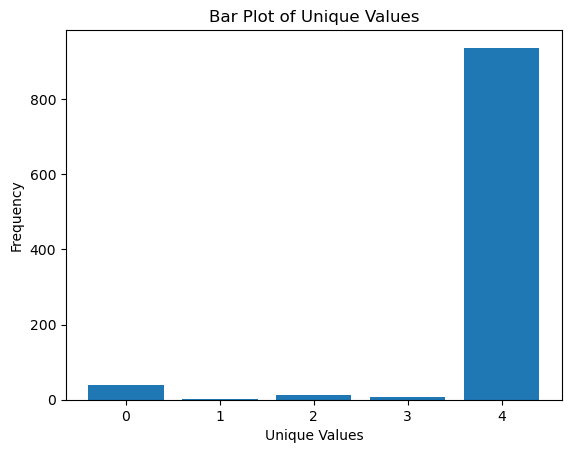

In [15]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_values, counts)

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Unique Values')

plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=10, linkage="complete")  
#"ward", "complete", "average", "single"
cluster_labels = agg_clustering.fit_predict(datafinal2)

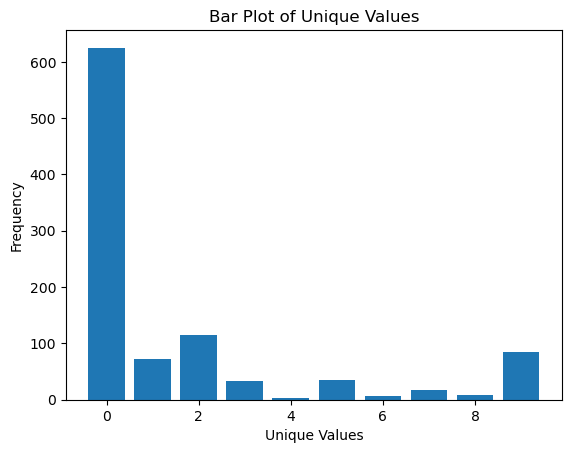

In [17]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_values, counts)

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Unique Values')

plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=10, linkage="ward")  
#"ward", "complete", "average", "single"
cluster_labels = agg_clustering.fit_predict(datafinal2)

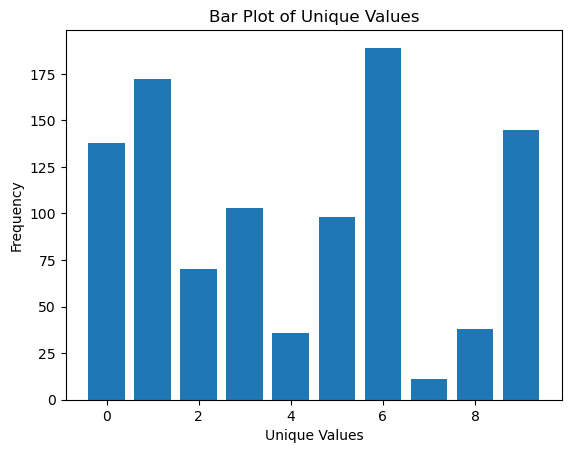

In [19]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_values, counts)

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Unique Values')

plt.show()

# QUESTION 1

In [21]:
def single_linkage(data, cluster1, cluster2):
    return np.min(np.array([[np.linalg.norm(p1 - p2) for p2 in cluster2] for p1 in cluster1]))

def complete_linkage(data, cluster1, cluster2):
    return np.max(np.array([[np.linalg.norm(p1 - p2) for p2 in cluster2] for p1 in cluster1]))

def average_linkage(data, cluster1, cluster2):
    distances = [np.linalg.norm(p1 - p2) for p1 in cluster1 for p2 in cluster2]
    return np.mean(distances)

def centroid_linkage(data, cluster1, cluster2):
    centroid1 = np.mean(cluster1, axis=0)
    centroid2 = np.mean(cluster2, axis=0)
    return np.linalg.norm(centroid1 - centroid2)

def create_distance_matrix(data):
    num_points = len(data)
    distance_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i, num_points):
            distance = np.linalg.norm(data[i] - data[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix

def print_clusters(clusters):
    for i, cluster in enumerate(clusters):
        num_points = len(cluster)
        print(f"Cluster {i + 1} has {num_points} points.")

def agglomerative_clustering1(data, k):
    distance_matrix = create_distance_matrix(data)
    clusters = [list([point]) for point in data]

    while len(clusters) > k:
        distances = [(i, j, single_linkage(data, clusters[i], clusters[j])) for i in range(len(clusters)) for j in range(i+1, len(clusters))]
        i, j, _ = min(distances, key=lambda x: x[2])

        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]

    return clusters

In [ ]:
num_clusters = 10
clusters_list = agglomerative_clustering1(datafinal2, num_clusters)

print_clusters(clusters_list)


In [ ]:
def plot_cluster_sizes(clusters):
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_numbers = list(range(1, len(clusters) + 1))

    plt.bar(cluster_numbers, cluster_sizes)
    plt.xlabel('Cluster Number')
    plt.ylabel('Number of Points')
    plt.title('Cluster Sizes')
    plt.show()

In [ ]:
plot_cluster_sizes(clusters_list)

In [ ]:
def single_linkage(distance_matrix, cluster1, cluster2):
    return np.min(distance_matrix[cluster1][:, cluster2])

def complete_linkage(distance_matrix, cluster1, cluster2):
    return np.max(distance_matrix[cluster1][:, cluster2])

def average_linkage(distance_matrix, cluster1, cluster2):
    distances = [distance_matrix[i, j] for i in cluster1 for j in cluster2]
    return np.mean(distances)

def centroid_linkage(distance_matrix, cluster1, cluster2):
    centroid1 = np.mean(distance_matrix[cluster1], axis=0)
    centroid2 = np.mean(distance_matrix[cluster2], axis=0)
    return euclidean_distance(centroid1, centroid2)

def create_distance_matrix(data):
    num_points = len(data)
    distance_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i, num_points):
            distance = euclidean_distance(data[i], data[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance  
    return distance_matrix